E:\Data Science\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


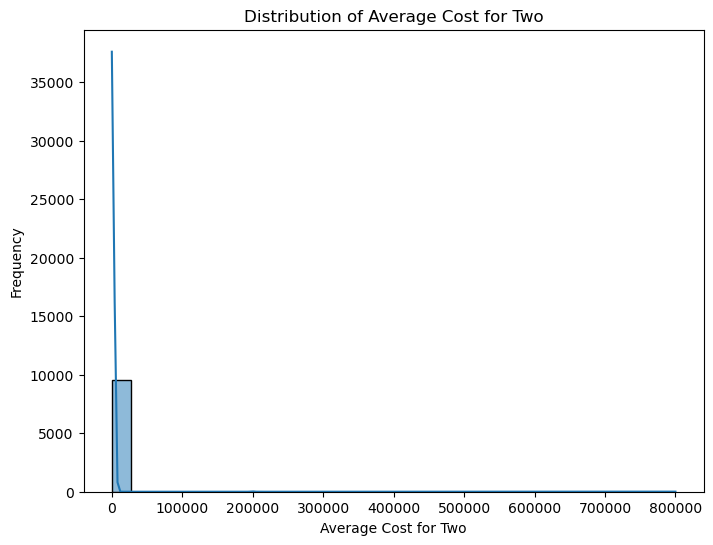

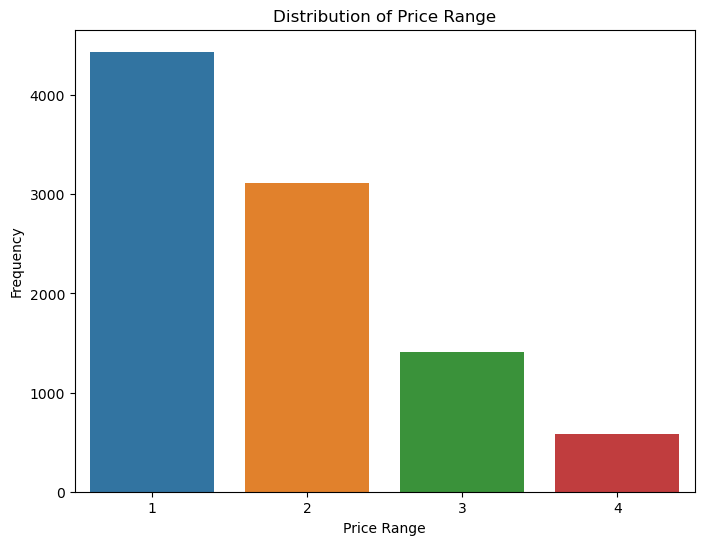

Average Cost for Two - RMSE: 12093.412124974766
Average Cost for Two - R^2 Score: 0.007944865989838457
Price Range - RMSE: 0.7519161694571875
Price Range - R^2 Score: 0.2892573500657142


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
zomato_data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv", encoding='ISO-8859-1')
country_code_data = pd.read_excel("https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Z_Restaurant/Country-Code.xlsx?raw=true")

# Merge datasets
zomato_data = pd.merge(zomato_data, country_code_data, on='Country Code', how='left')

# Data Cleaning and Preprocessing
# Remove irrelevant columns
columns_to_drop = ['Restaurant ID', 'Country Code', 'Address', 'Locality Verbose', 'Rating color', 'Rating text']
zomato_data.drop(columns_to_drop, axis=1, inplace=True)

# Handle missing values
zomato_data.dropna(inplace=True)

# Data Exploration and Visualization
# Visualize distribution of average cost for two
plt.figure(figsize=(8, 6))
sns.histplot(zomato_data['Average Cost for two'], bins=30, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of price range
plt.figure(figsize=(8, 6))
sns.countplot(x='Price range', data=zomato_data)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering
# Extracting features from cuisines
zomato_data['Cuisine Count'] = zomato_data['Cuisines'].apply(lambda x: len(x.split(',')))

# Model Building
# Splitting the data into features and target variables
X = zomato_data[['Cuisine Count', 'Aggregate rating', 'Votes']]
y_avg_cost = zomato_data['Average Cost for two']
y_price_range = zomato_data['Price range']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_avg_cost, y_test_avg_cost = train_test_split(X, y_avg_cost, test_size=0.2, random_state=42)
X_train, X_test, y_train_price_range, y_test_price_range = train_test_split(X, y_price_range, test_size=0.2, random_state=42)

# Model training
from sklearn.linear_model import LinearRegression
avg_cost_model = LinearRegression()
avg_cost_model.fit(X_train, y_train_avg_cost)

price_range_model = LinearRegression()
price_range_model.fit(X_train, y_train_price_range)

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score
avg_cost_predictions = avg_cost_model.predict(X_test)
avg_cost_rmse = np.sqrt(mean_squared_error(y_test_avg_cost, avg_cost_predictions))
avg_cost_r2 = r2_score(y_test_avg_cost, avg_cost_predictions)

price_range_predictions = price_range_model.predict(X_test)
price_range_rmse = np.sqrt(mean_squared_error(y_test_price_range, price_range_predictions))
price_range_r2 = r2_score(y_test_price_range, price_range_predictions)

print("Average Cost for Two - RMSE:", avg_cost_rmse)
print("Average Cost for Two - R^2 Score:", avg_cost_r2)
print("Price Range - RMSE:", price_range_rmse)
print("Price Range - R^2 Score:", price_range_r2)

